# Q3.1 Reproduction des etapes 2 a 4 d'un projet de ML
Cette question sera repondu a travers la reponse au autres questions, pour l'instant simplement importer les donnees.

In [11]:
import pandas as pd
import numpy as np

customer = pd.read_csv('Customer.csv')

# Q3.2 Nettoyage des donnees du dataset de base
Premiere etapes de nettoyage et de prise de conscience du dataset
# Q3.2.1 Remplacement des donnees manquantes
## Exploration et prise de conscience du dataset

In [2]:
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  str    
 3   gender            10000 non-null  str    
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  str    
 7   revenue           10000 non-null  str    
dtypes: bool(1), float64(3), str(4)
memory usage: 556.8 KB


On peut observer qu'il n'y a aucune valeur null dans ce dataset.

In [3]:
customer.describe(include='all')

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
count,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000,10000
unique,NaN,NaN,11,2,2,NaN,50,469
top,NaN,NaN,44.0,Fem,False,NaN,China,61
freq,NaN,NaN,2083,6902,7200,NaN,200,83
mean,37.431400,5.995000,NaN,NaN,NaN,4.412000,NaN,NaN
std,9.490474,2.438559,NaN,NaN,NaN,2.418231,NaN,NaN
min,18.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,31.000000,5.000000,NaN,NaN,NaN,3.000000,NaN,NaN
50%,37.000000,6.000000,NaN,NaN,NaN,4.000000,NaN,NaN
75%,43.000000,7.000000,NaN,NaN,NaN,6.000000,NaN,NaN


In [23]:
print(customer.isna().sum())
print(customer.isnull().sum())

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64
age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64


Il n'y a pas de valeur null dans le dataset

In [13]:
customer.value_counts()

age   pages  first_item_prize  gender  ReBuy  News_click  country  revenue
25.0  8.0    57.0              Masc    False  3.0         Turkey   110        2
43.0  9.0    102.0             Fem     False  6.0         Nepal    138        2
41.0  6.0    28.0              Fem     False  4.0         China    113        1
34.0  4.0    15.5              Fem     True   2.0         China    36         1
38.0  5.0    ?                 Fem     False  7.0         China    111        1
                                                                             ..
49.0  8.0    44.0              Masc    False  4.0         Taiwan   254        1
32.0  5.0    42.0              Masc    False  1.0         Taiwan   82         1
47.0  8.0    15.5              Fem     True   3.0         Taiwan   117        1
42.0  7.0    42.0              Fem     False  2.0         Taiwan   70         1
41.0  5.0    42.0              Fem     False  2.0         Taiwan   107        1
Name: count, Length: 9998, dtype: int64

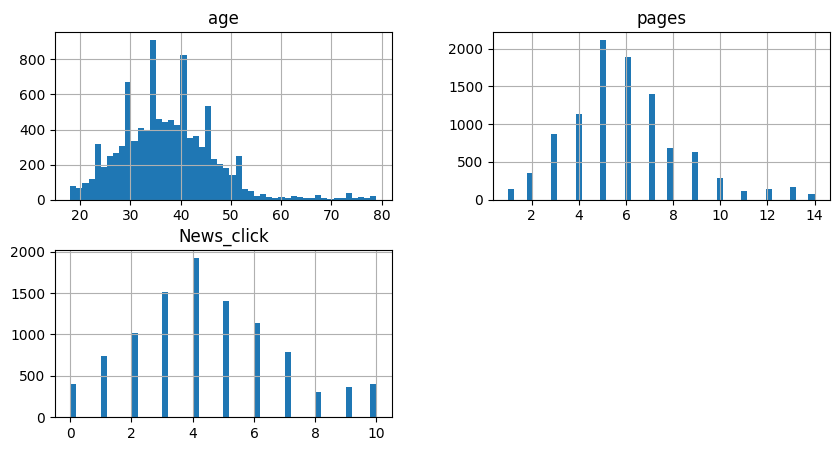

In [12]:
import matplotlib.pyplot as plt
customer.hist(bins=50, figsize=(10,5))
plt.show()

On peut remarquer par les tableaux qu'il y a peu d'outliers. En effet, les sujets semblent suivre une courbe au niveau de la moyenne.
Il est cependant interessant de note la difference d'echelle entre les variables. Il sera important de les normaliser pour le machine learning.

## Creation du pipeline de remplissage
> Note:
> Il n'y a pas de valeur null presentement dans ce dataset, ce pipeline est simplement la au besoins si des valeurs nulls sont ajouter.

# 3.2.2 Remplacement des donnees aberrantes

KeyError: "None of [Index(['age'], dtype='str')] are in the [columns]"

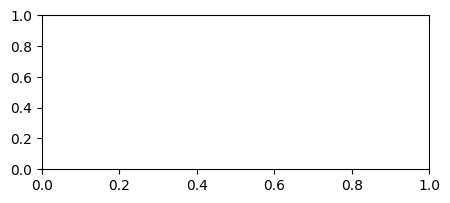

In [78]:
import matplotlib.pyplot as plt

for col in num_attribs:
    plt.figure(figsize=(5,2))
    customer.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
plt.show()

Avec c'est graphique, il est possible d'observer que les pages et les ages ont tout les deux des outliers.

In [82]:
def iqr_amplitude(data):
    data_copy = data.copy()
    for col in data_copy:
        col_data = data_copy[col]

        Q1 = np.percentile(col_data, 25)
        Q3 = np.percentile(col_data, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Remplacer les valeurs < lower par Q1
        data_copy[col] = np.where(data_copy[col] < lower, Q1, data_copy[col])
        # Remplacer les valeurs > upper par Q3
        data_copy[col] = np.where(data_copy[col] > upper, Q3, data_copy[col])

    return data_copy

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

num_attribs = ['age', 'pages', 'News_click']
cat_attribs = ['first_item_prize', 'gender', 'ReBuy', 'country', 'revenue']

numeric_transformer = Pipeline([
    ("iqr outliers", FunctionTransformer(iqr_amplitude, validate=False)),
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

clean_customer = preprocessor.fit_transform(customer)
customer_array = clean_customer.toarray()
pd.DataFrame(customer_array).info()
pd.DataFrame(customer_array).head()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 537 entries, 0 to 536
dtypes: float64(537)
memory usage: 41.0 MB


,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,536
0,0.514824,0.118756,-0.170381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.349058,-0.955960,-0.997473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.144589,-0.418602,1.070257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.076821,-0.418602,-0.997473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.268001,2.268188,-0.170381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Q3.3 Enrichissement des donnees